# **HOUSE PRICE PREDICTION USING LINEAR REGRESSION**

***Problem Statement:***

We aim to predict house prices based on features like square footage, number of bedrooms, and bathrooms.
Our goal is to help buyers and sellers make informed decisions through accurate price estimation.

## **IMPORTING LIBRARIES AND LOADING DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## **DATA CLEANING**

**Checking For Missing Values.**

In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


**Check Data Types**

In [7]:
print("\nData types:\n")
print(df.info())


Data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

Remove rows where square footage, bedrooms, or bathrooms are <= 0

In [8]:
df = df[df['GrLivArea'] > 0]
df = df[df['BedroomAbvGr'] > 0]
df = df[df['FullBath'] > 0]

**Data Cleaned**

In [9]:
print("\nData cleaned. New shape:", df.shape)


Data cleaned. New shape: (1450, 81)


# **EXPLORATORY DATA ANALYSYS(EDA)**

**Basic Statistics**

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.00000,1450.000000,1194.000000,1450.000000,1450.000000,1450.00000,1450.000000,1450.000000,1442.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,730.98069,56.806897,70.125628,10493.582759,6.104828,5.58069,1971.255172,1984.896552,104.163662,440.762069,...,93.627586,46.800000,22.105517,3.433103,15.010345,2.777931,43.375172,6.326897,2007.815172,180946.302069
std,421.47350,42.319857,24.326246,9951.357382,1.371117,1.10306,30.245985,20.652712,181.470410,454.032515,...,123.918613,66.379651,61.302376,29.416948,55.666914,40.315051,497.605500,2.699724,1.326709,79267.760546
min,1.00000,20.000000,21.000000,1300.000000,1.000000,2.00000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,366.25000,20.000000,59.000000,7560.000000,5.000000,5.00000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.50000,50.000000,70.000000,9478.500000,6.000000,5.00000,1972.500000,1994.000000,0.000000,381.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.75000,70.000000,80.000000,11600.000000,7.000000,6.00000,2000.000000,2004.000000,166.000000,706.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.00000,190.000000,313.000000,215245.000000,10.000000,9.00000,2010.000000,2010.000000,1600.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Identifying categoorical columns**

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns

**Label Encode Categorical Columns**

In [12]:
le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [13]:
correlation_matrix = df_encoded.corr()

**Correlation only with SalePrice(Target Variable)**

In [14]:
corr_with_price = correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False)

In [15]:
x = df[['GrLivArea','BedroomAbvGr','FullBath']]
y = df['SalePrice']

**Display Top Correlated Features**

In [16]:
print("\nTop 15 features (including encoded categorical ones) correlated with SalePrice:")
print(corr_with_price.head(15))


Top 15 features (including encoded categorical ones) correlated with SalePrice:
              SalePrice
SalePrice      1.000000
OverallQual    0.790228
GrLivArea      0.708642
GarageCars     0.639709
GarageArea     0.621239
TotalBsmtSF    0.611495
1stFlrSF       0.603640
FullBath       0.576113
TotRmsAbvGrd   0.538292
YearBuilt      0.522544
YearRemodAdd   0.506390
GarageYrBlt    0.486713
MasVnrArea     0.480957
Fireplaces     0.466304
BsmtFinSF1     0.384463


**HEAT MAP**

In [17]:
top_corr_features = corr_with_price[abs(corr_with_price['SalePrice']) > 0.3].index

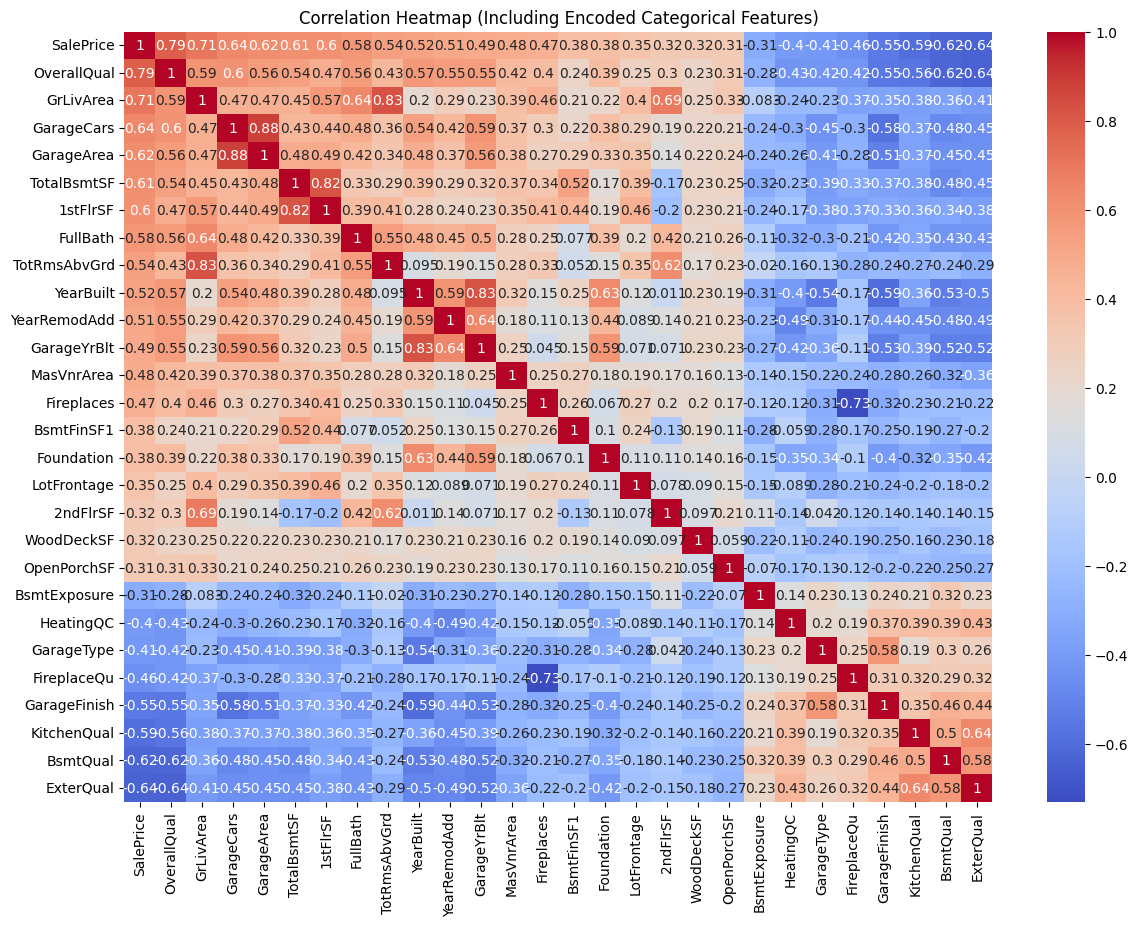

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Including Encoded Categorical Features)")
plt.show()

**Distributions**

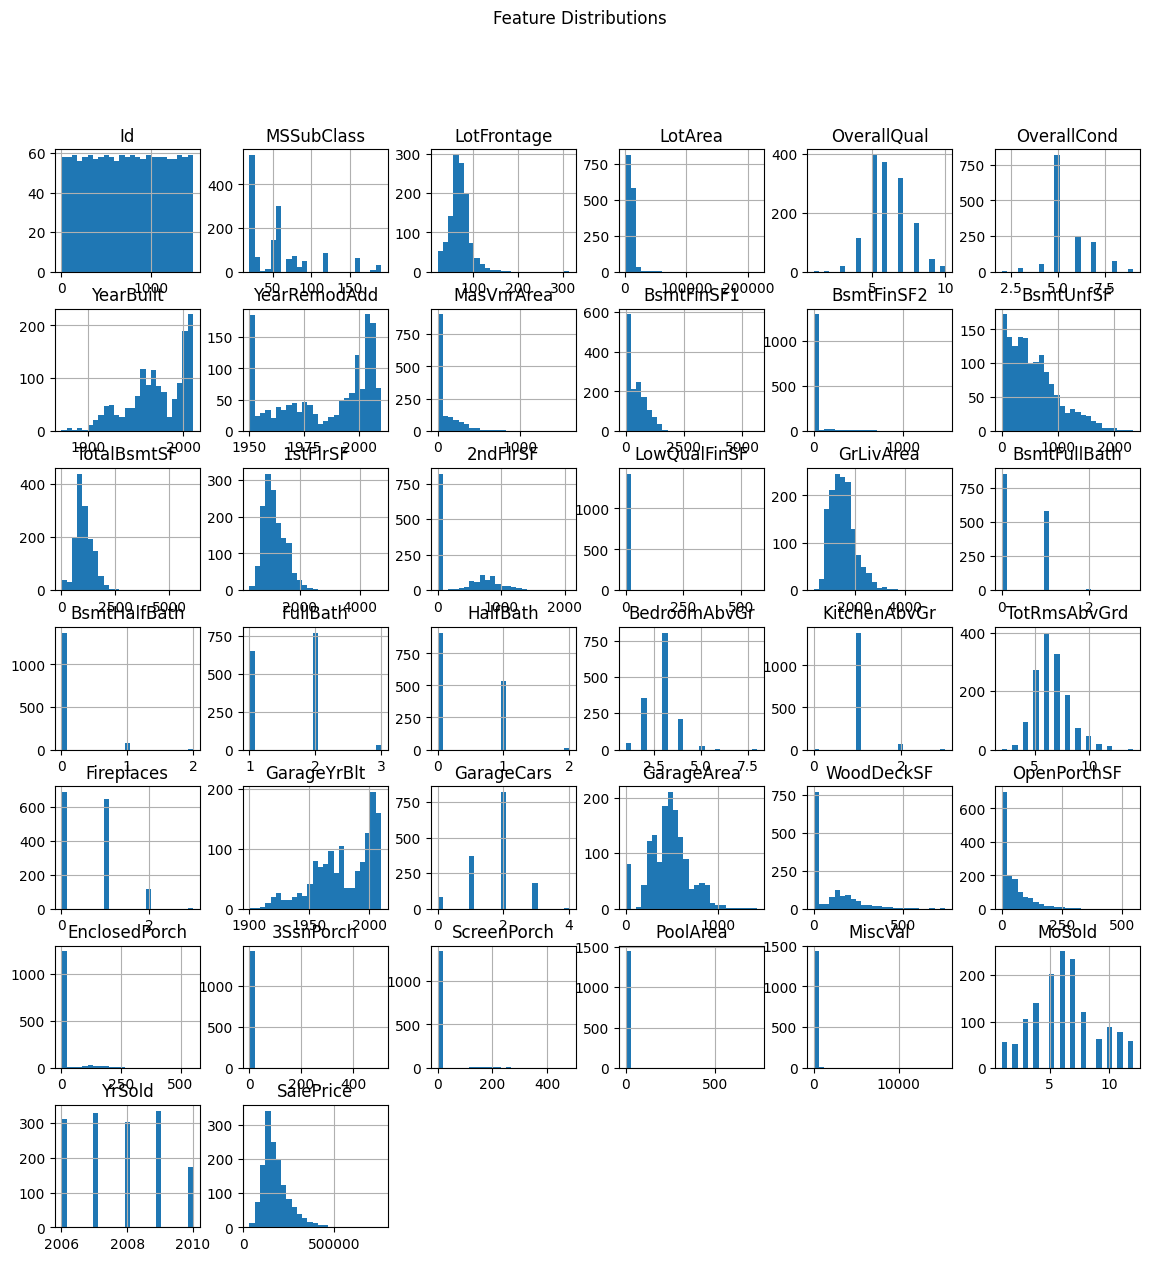

In [24]:
df.hist(bins=25, figsize=(14,14))
plt.suptitle("Feature Distributions")
plt.show()

**INDIVIDUAL SCATTERED PLOT FOR EACH RELATIONSHIP**

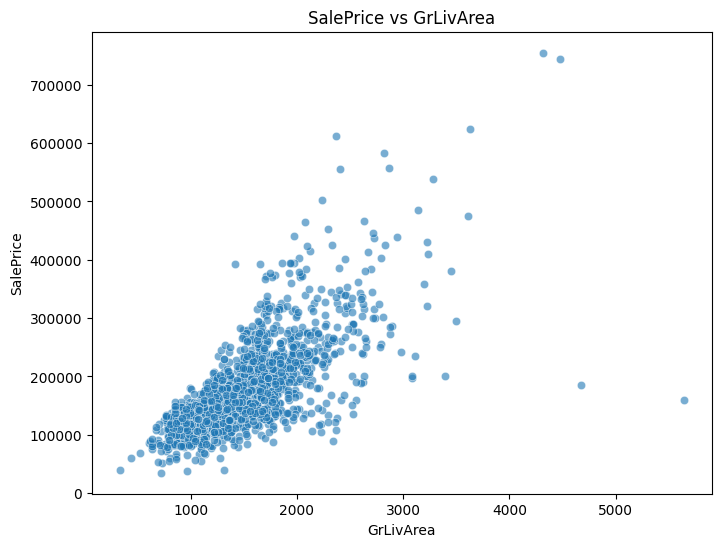

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6)
plt.title('SalePrice vs GrLivArea')
plt.show()

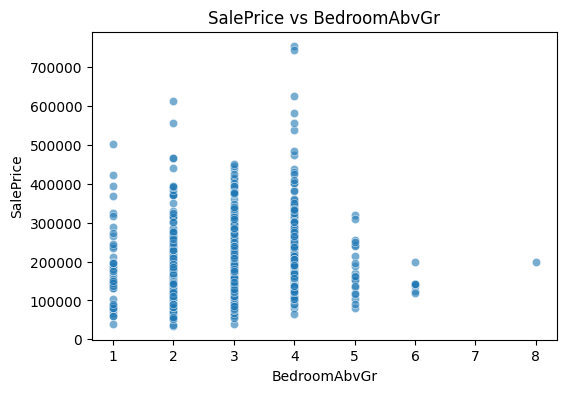

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df, alpha=0.6)
plt.title('SalePrice vs BedroomAbvGr')
plt.show()

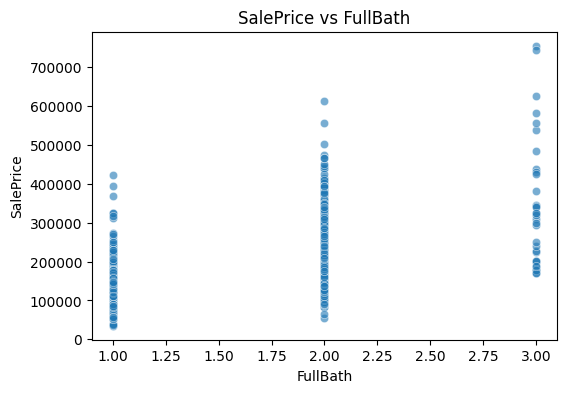

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='FullBath', y='SalePrice', data=df, alpha=0.6)
plt.title('SalePrice vs FullBath')
plt.show()

# **MODEL BUILDING**

In [29]:
x = df[['GrLivArea','BedroomAbvGr','FullBath']]
y = df['SalePrice']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred = model.predict(x_test)

# **MODEL EVALUATION**

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 2033603267.88
RMSE: 45095.49
MAE: 33936.37
R² Score: 0.59


**Actual Vs Predicted**

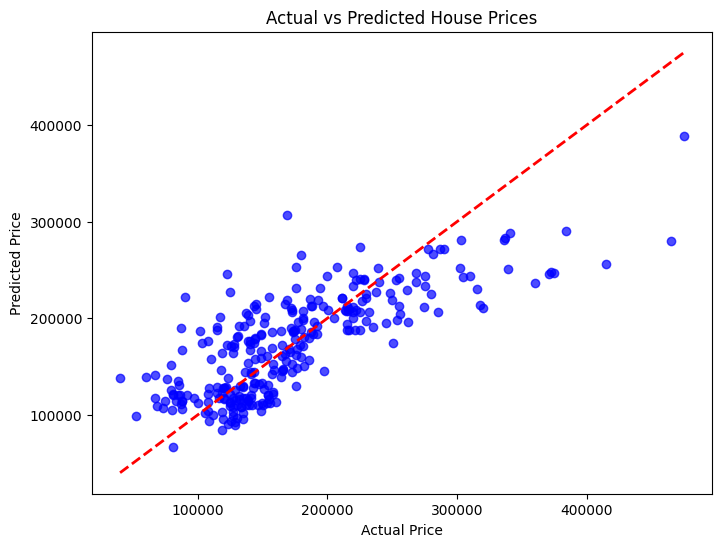

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

**RESIDUALS PLOT**

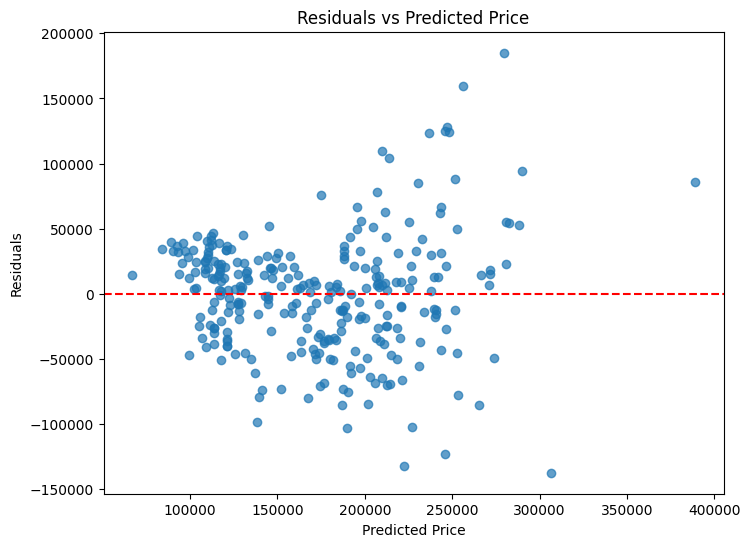

In [35]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.show()

# **CONCLUSION**



1.   The model explains about `R² Score × 100 %` of the variance in house prices.
2.   Predictions are generally accurate for most average-priced homes, but errors are visible for very high-priced outliers.
3.  Adding features like location, lot size, and property age would likely improve accuracy.
4.  Residual analysis shows that the errors are distributed randomly, but with some larger errors for high-price predictions.